In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from posixpath import split
import pandas as pd
import re
import csv  
import os
import random

def get_all_posts(path): #function to read all .txt files under a directory

  files_content = []

  for filename in filter(lambda p: p.endswith("txt"), os.listdir(path)):
      filepath = os.path.join(path, filename)
      with open(filepath, mode='r') as f:
          files_content += [f.read()]
  return files_content

In [3]:
# data paths determined
path = "/content/drive/MyDrive/Thesis/ChnSentiCorp/2000/"

path1 = path + "pos"
pos_texts = get_all_posts(path1)
random.Random(0).shuffle(pos_texts)

path2 = path + "neg"
neg_texts = get_all_posts(path2)
random.Random(0).shuffle(neg_texts)



In [4]:
print(pos_texts[:3])

['地理位置好，环境不错，房间很大，但是早餐不如过去丰盛，整体感觉不错。特别强调，服务好！\n\n\n\n', '地点和位置很好，晚上比较安静，设施较全。对于一般的自助游来说比较合适。\n\n\n\n', '紧靠维港，风景非常棒。周边有钓鱼的老人，散步的游客，非常安逸的情景。\n\n酒店的服务不错，也很安静，就是逛街不太方便，好在有30分钟一班的穿梭巴士可以送到么地道和尖沙嘴的北京道。旁边新开发的黄埔新天地不怎么样，美食广场和商场都不怎么样。下次再去血拼，我肯定不住这家酒店了，虽然服务很好。\n\n\n\n']


In [5]:
def train_test_set(pos_texts, neg_texts):

  def change_text(text):
    newtext = " ".join(text)
    return str(newtext)

  for i, c in enumerate(pos_texts):
    pos_texts[i] = change_text(c)

  for i, c in enumerate(neg_texts):
    neg_texts[i] = change_text(c)

  
  return pos_texts, neg_texts

In [6]:
# getting bigger data size for bigger training set experiment

# data paths determined
final_path = "/content/drive/MyDrive/Thesis/ChnSentiCorp/4000/"

final_path1 = final_path + "pos"
final_pos_texts = get_all_posts(final_path1)

final_path2 = final_path + "neg"
final_neg_texts = get_all_posts(final_path2)

print(len(final_pos_texts), len(final_neg_texts))

2000 2000


In [7]:
pos, neg= train_test_set(pos_texts, neg_texts)
new_pos = pos[:400]
new_neg = neg[:400]
all_labels = ['neg']*400 + ['pos']*400
all_posts = new_neg + new_pos
vali_X = neg[400:500] + pos[400:500] # altogether 200 posts in validation set
vali_Y = ['neg']*100 + ['pos']*100
print(vali_X[:3])
print(vali_Y[:3])
test_X = neg[500:1000] + pos[500:1000] # altogether 1000 posts in test set
test_Y = ['neg']*500 + ['pos']*500
print(len(neg), len(pos))

['因 为 办 事 处 要 装 修 的 原 因 ， 我 住 在 这 旅 馆 里 ． 这 家 靠 关 系 得 到 所 谓 ４ 星 的 旅 馆 ， 是 怎 么 样 的 我 现 在 告 诉 大 家 一 下 ， 在 宜 宾 去 那 家 都 比 这 家 好 ， 晚 上 这 里 的 鸡 叫 不 停 ． 而 且 不 分 公 母 的 ． 会 一 直 叫 到 ２ 点 ， 我 晚 上 火 了 ， 总 台 会 将 那 个 是 男 的 住 的 房 间 告 诉 给 鸡 婆 ， 晚 上 你 就 别 想 睡 的 好 ． 投 诉 了 他 们 说 他 们 没 告 \n \n \n \n \n', '地 理 位 置 不 错 ， 距 离 商 业 中 心 政 治 中 心 和 黄 河 都 很 近 。 \n \n 但 是 服 务 太 差 ， 连 东 部 地 区 的 三 星 都 不 如 。 \n \n 1 。 白 天 门 童 公 然 和 闲 人 说 话 而 不 招 呼 客 人 \n \n 2 。 在 酒 店 住 了 2 天 ， 没 有 一 个 服 务 人 员 遇 到 的 时 候 主 动 说 “ 你 好 ” \n \n 3 。 早 餐 太 差 ， 品 种 少 ， 服 务 差 。 如 果 不 主 动 要 ， 是 不 会 有 服 务 员 问 你 是 否 要 咖 啡 的 ， 而 煎 蛋 的 厨 师 更 是 绝 大 多 数 时 候 都 不 知 去 向 ， 在 的 时 候 也 态 度 很 差 。 \n \n 4 。 酒 店 开 业 时 间 不 长 ， 但 是 地 毯 等 都 很 脏 了 ， 连 棉 签 也 没 有 。 \n \n 5 。 酒 店 结 构 奇 怪 ， 感 觉 象 是 按 政 府 办 公 楼 设 计 的 。 \n \n 6 。 电 梯 速 度 非 常 慢 ， 一 共 3 个 客 梯 ， 控 制 纽 居 然 不 是 联 网 的 。 \n \n 7 。 任 何 人 都 可 以 用 客 梯 ， 我 就 见 过 送 快 递 的 、 送 饭 的 等 人 。 \n \n 8 。 大 堂 副 理 / 经 理 的 位 置 是 空 的 ， 只 见 过 几 个 军 人 经 常 坐 在 那 里 ， 好 奇 怪 。 \n \n 总 而 言 之 是 一 个 非 常 不 愉 快 的 经 历 。 我 是 8 月 1 8 日 入 住 的 飞 

In [8]:
print(len(all_posts), len(test_X))

800 1000


In [9]:
big_pos, big_neg = train_test_set(final_pos_texts, final_neg_texts)
final_posts = big_neg + big_pos 
final_labels = ['neg']*2000 + ['pos']*2000
final_df = pd.DataFrame(list(zip(final_posts, final_labels)),
              columns=['sentences','label_desc'])
print(len(final_df))
final_df.groupby('label_desc').size()

4000


label_desc
neg    2000
pos    2000
dtype: int64

In [10]:
import pandas as pd
from io import StringIO


df = pd.DataFrame(list(zip(all_posts, all_labels)),
              columns=['sentences','label_desc'])
print(len(df))

vali_df = pd.DataFrame(list(zip(vali_X, vali_Y)),
              columns=['sentences','label_desc'])
print(len(vali_df))

test_df = pd.DataFrame(list(zip(test_X, test_Y)),
              columns=['sentences','label_desc'])
print(len(test_df))

new_df = pd.concat([df, vali_df, test_df, final_df], axis=0)
print(len(new_df))

col = ['label_desc', 'sentences']
new_df = new_df[col]
new_df = new_df[pd.notnull(new_df['sentences'])]
new_df.columns = ['label_desc', 'sentences']
new_df['category_id'] = new_df['label_desc'].factorize()[0]
print(len(new_df))

# category_id_df = new_df[['label_desc', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'label_desc']].values)
# new_df.head()

df = new_df[:800] # altogether 800 posts in training set
vali_df = new_df[800:1000] # altogether 200 posts in validation set
test_df = new_df[1000:2000] # altogether 1000 posts in test set
final_df = new_df[2000:6000] # altogether 4000 posts in final training set


final_df.head()
final_df.groupby('label_desc').size()

800
200
1000
6000
6000


label_desc
neg    2000
pos    2000
dtype: int64

In [11]:
print(final_df)

     label_desc                                          sentences  \
0           neg  挺 一 般 的 酒 店 , 酒 店 门 口 的 马 路 挺 吵 的 , 性 价 比 不 高 ...   
1           neg  春 节 前 往 香 港 度 假 ， 入 住 富 豪 东 方 酒 店 。 该 酒 店 价 格 ...   
2           neg  差 劲 ， 并 没 有 特 殊 的 ， 我 订 了 2 天 的 房 ， 到 第 三 天 续 ...   
3           neg  一 定 一 定 不 能 去 住 ， 理 由 如 下 \n \n 1 、 管 理 不 善 ， ...   
4           neg  全 家 五 一 期 间 选 择 去 富 阳 休 闲 两 日 , 通 过 携 程 订 了 3 ...   
...         ...                                                ...   
3995        pos  3 星 的 硬 件 , 4 星 的 外 观 , 5 星 的 服 务 \n \n 房 间 设 ...   
3996        pos  客 房 、 前 台 服 务 还 可 以 ， 就 是 收 银 方 面 存 在 问 题 ， 我 ...   
3997        pos  确 实 是 山 上 最 好 的 酒 店 ， 环 境 和 设 施 都 很 不 错 。 我 们 ...   
3998        pos  酒 店 适 合 度 假 ， 在 尖 沙 咀 汉 口 道 逢 整 点 有 免 费 班 车 往 ...   
3999        pos  这 次 到 南 京 才 知 道 原 来 这 家 酒 店 是 名 古 屋 和 南 京 合 作 ...   

      category_id  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
3995            1  

In [12]:
### Defining the model and tuning process ###

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,recall_score,precision_score,f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid

def SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test):

    clf = LinearSVC()

    best_score = 0
    # defining parameter range
    grid = {
            'C': [0.001, 0.1, 1, 10, 25, 50, 100], 
            
            
        }
    paramGrid = ParameterGrid(grid)
    for params in paramGrid:
            clf.set_params(**params)
            clf.fit(X_train, y_train)
            # PREDICT VALUE BASED ON UPDATED PARAMETERS
            y_vali_result = clf.predict(vali_X)
            f1 = f1_score(vali_Y,y_vali_result, average = 'macro')
            if f1 > best_score:
                  best_score = f1
                  best_grid = params
    print(type(y_vali_result))
    print(type(vali_X))

    print("Best score:", best_score )
    print("Grid:", best_grid)
    # # NEW MODEL EVALUATION METRICS 
    t = LinearSVC()
    model = t.set_params(**best_grid)
    model.fit(X_train,y_train)
    # print(type(test_X))
    y_pred_test = model.predict(X_test)
    print(type(y_pred_test))
    print(type(y_test))
    print("####################################")
    print("By using SVC model, the best parameter and its evaluation metrics are:")
    accuracy = accuracy_score(y_test,y_pred_test)
    precision = precision_score(y_test,y_pred_test, average = 'macro')
    recall = recall_score(y_test,y_pred_test, average = 'macro')
    f1 = f1_score(y_test,y_pred_test, average = 'macro')
    print('Best parameters: ' + str(model))
    print('Accuracy Score : ' + str(accuracy))
    print('Precision Score : ' + str(precision))
    print('Recall Score : ' + str(recall))
    print('F1 Score : ' + str(f1))
    return f1



In [13]:
# remove the label which has the least samples, then increase the size of dataframe by 100 per group
# then randomly select same amount of samples from the left categories

df_10 = df.sample(n = 10, random_state = 2)
df_20 = df.sample(n = 20, random_state = 2)
df_30 = df.sample(n = 30, random_state = 2)
df_40 = df.sample(n = 40, random_state = 2)
df_50 = df.sample(n = 50, random_state = 2)
df_60 = df.sample(n = 60, random_state = 2)
df_70 = df.sample(n = 70, random_state = 2)
df_80 = df.sample(n = 80, random_state = 2)
df_90 = df.sample(n = 90, random_state = 2)
df_100 = df.sample(n = 100, random_state = 2)
df_200 = df.sample(n = 200, random_state = 2)
df_300 = df.sample(n = 300, random_state = 2)
df_400 = df.sample(n = 400, random_state = 2)
df_500 = df.sample(n = 500, random_state = 2)

print(df_70.groupby('label_desc').size())

label_desc
neg    38
pos    32
dtype: int64


In [14]:
########################### Data Size = 10 ##################################

neg    6
pos    4
Name: label_desc, dtype: int64


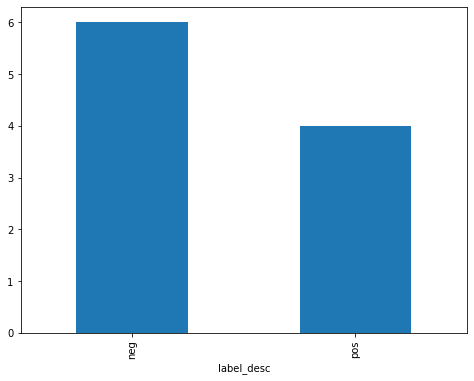

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_10.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_10['label_desc'].value_counts())
plt.show()

In [16]:
df_0 = pd.concat([df_10, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1210, 6136)

In [17]:
X_train = features[:10]
vali_X = features[10:210]
y_train = labels[:10]
vali_Y = labels[10:210]
X_test = features[210:]
y_test = labels[210:]
print(type(X_test))

f1_10 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.3503118503118503
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.513
Precision Score : 0.6580816187557761
Recall Score : 0.513
F1 Score : 0.36799128944052306


In [18]:
########################### Data Size = 20 ##################################

neg    10
pos    10
Name: label_desc, dtype: int64


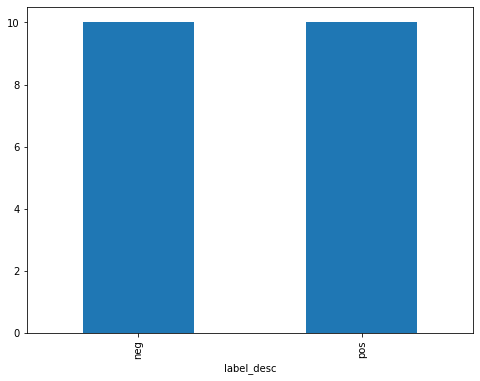

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_20.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_20['label_desc'].value_counts())
plt.show()

In [20]:
df_0 = pd.concat([df_20, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1220, 6159)

In [21]:
X_train = features[:20]
vali_X = features[20:220] # altogether 200 posts in validation set
y_train = labels[:20]
vali_Y = labels[20:220]
X_test = features[220:]
y_test = labels[220:]
# print(type(X_test))

f1_20 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.7415824276050772
Grid: {'C': 0.001}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=0.001)
Accuracy Score : 0.713
Precision Score : 0.7286988004586861
Recall Score : 0.713
F1 Score : 0.7079887957234094


In [22]:
########################### Data Size = 30 ##################################

neg    17
pos    13
Name: label_desc, dtype: int64


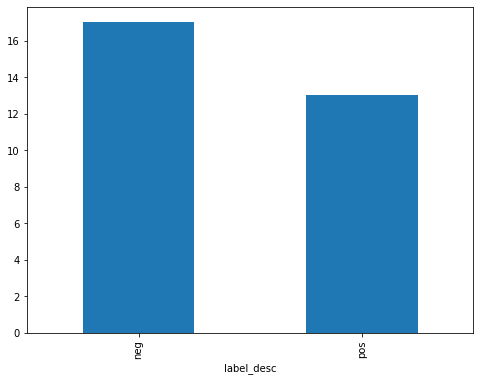

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_30.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_30['label_desc'].value_counts())
plt.show()

In [24]:
df_0 = pd.concat([df_30, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1230, 6206)

In [25]:
X_train = features[:30]
vali_X = features[30:230] # altogether 200 posts in validation set
y_train = labels[:30]
vali_Y = labels[30:230]
X_test = features[230:]
y_test = labels[230:]
# print(type(X_test))

f1_30 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.6506168795720058
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.645
Precision Score : 0.7364968456213832
Recall Score : 0.645
F1 Score : 0.6069874313473467


In [26]:
########################### Data Size = 40 ##################################

neg    24
pos    16
Name: label_desc, dtype: int64


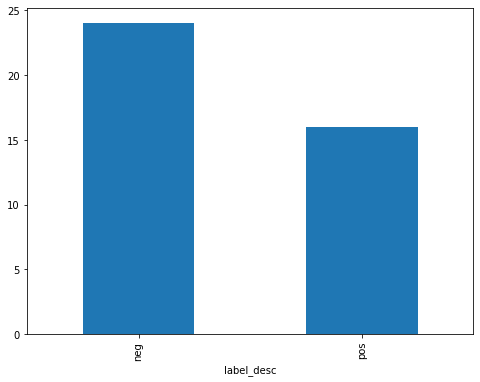

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_40.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_40['label_desc'].value_counts())
plt.show()

In [28]:
df_0 = pd.concat([df_40, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1240, 6244)

In [29]:
X_train = features[:40]
vali_X = features[40:240] # altogether 200 posts in validation set
y_train = labels[:40]
vali_Y = labels[40:240]
X_test = features[240:]
y_test = labels[240:]
# print(type(X_test))

f1_40 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.5856863134595194
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.627
Precision Score : 0.735047638789153
Recall Score : 0.627
F1 Score : 0.5785686927381624


In [30]:
########################### Data Size = 50 ##################################

neg    28
pos    22
Name: label_desc, dtype: int64


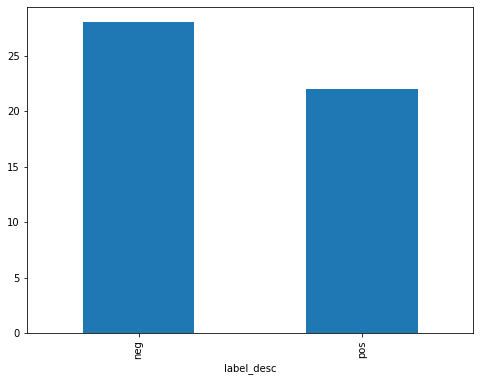

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_50.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_50['label_desc'].value_counts())
plt.show()

In [32]:
df_0 = pd.concat([df_50, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1250, 6276)

In [33]:
X_train = features[:50]
vali_X = features[50:250] # altogether 200 posts in validation set
y_train = labels[:50]
vali_Y = labels[50:250]
X_test = features[250:]
y_test = labels[250:]
# print(type(X_test))

f1_50 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.704360679970436
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.712
Precision Score : 0.7676551389786683
Recall Score : 0.712
F1 Score : 0.6962076589424651


In [34]:
########################### Data Size = 60 ##################################

neg    34
pos    26
Name: label_desc, dtype: int64


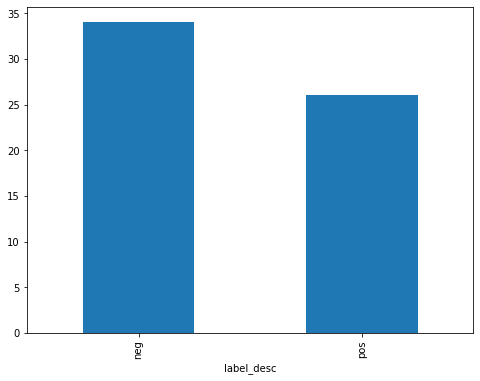

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_60.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_60['label_desc'].value_counts())
plt.show()

In [36]:
df_0 = pd.concat([df_60, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1260, 6307)

In [37]:
X_train = features[:60]
vali_X = features[60:260] # altogether 200 posts in validation set
y_train = labels[:60]
vali_Y = labels[60:260]
X_test = features[260:]
y_test = labels[260:]
# print(type(X_test))

f1_60 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.7074390276337137
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.693
Precision Score : 0.7622981119972166
Recall Score : 0.693
F1 Score : 0.6712889648386264


In [38]:
########################### Data Size = 70 ##################################

neg    38
pos    32
Name: label_desc, dtype: int64


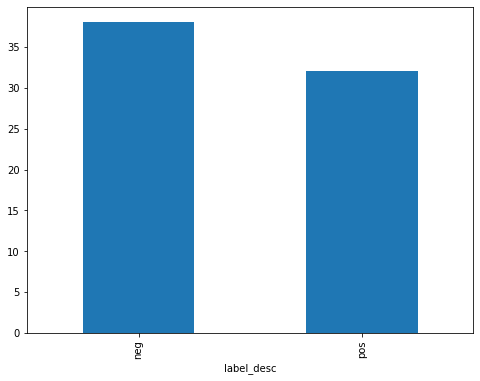

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_70.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_70['label_desc'].value_counts())
plt.show()

In [40]:
df_0 = pd.concat([df_70, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1270, 6340)

In [41]:
X_train = features[:70]
vali_X = features[70:270] # altogether 200 posts in validation set
y_train = labels[:70]
vali_Y = labels[70:270]
X_test = features[270:]
y_test = labels[270:]
# print(type(X_test))

f1_70 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.7639573070607554
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.752
Precision Score : 0.7914723517654897
Recall Score : 0.752
F1 Score : 0.7433094859565448


In [42]:
########################### Data Size = 80 ##################################

neg    43
pos    37
Name: label_desc, dtype: int64


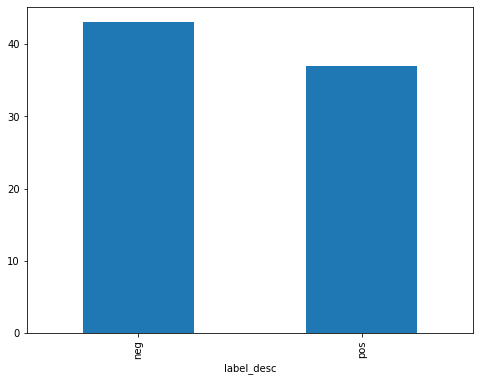

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_80.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_80['label_desc'].value_counts())
plt.show()

In [44]:
df_0 = pd.concat([df_80, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1280, 6395)

In [45]:
X_train = features[:80]
vali_X = features[80:280] # altogether 200 posts in validation set
y_train = labels[:80]
vali_Y = labels[80:280]
X_test = features[280:]
y_test = labels[280:]
# print(type(X_test))

f1_80 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.7803825429658572
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.775
Precision Score : 0.801018866767955
Recall Score : 0.775
F1 Score : 0.7700305910418228


In [46]:
########################### Data Size = 90 ##################################

neg    46
pos    44
Name: label_desc, dtype: int64


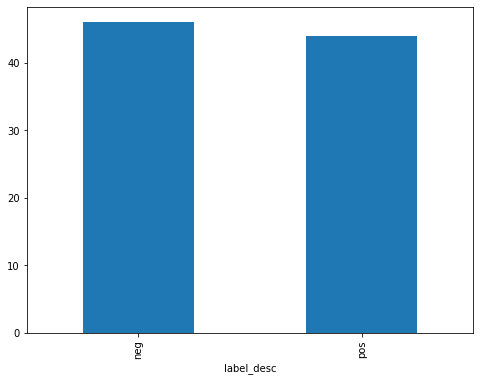

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_90.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_90['label_desc'].value_counts())
plt.show()

In [48]:
df_0 = pd.concat([df_90, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1290, 6452)

In [49]:
X_train = features[:90]
vali_X = features[90:290] # altogether 200 posts in validation set
y_train = labels[:90]
vali_Y = labels[90:290]
X_test = features[290:]
y_test = labels[290:]
# print(type(X_test))

f1_90 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.8282828282828283
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.798
Precision Score : 0.8089184123666883
Recall Score : 0.798
F1 Score : 0.796199216275006


In [50]:
########################### Data Size = 100 ##################################

neg    54
pos    46
Name: label_desc, dtype: int64


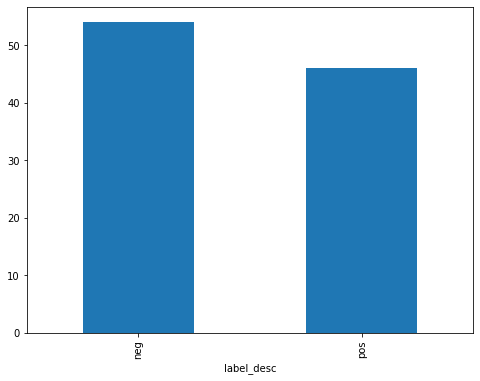

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_100.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_100['label_desc'].value_counts())
plt.show()

In [52]:
df_0 = pd.concat([df_100, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1300, 6520)

In [53]:
X_train = features[:100]
vali_X = features[100:300] # altogether 200 posts in validation set
y_train = labels[:100]
vali_Y = labels[100:300]
X_test = features[300:]
y_test = labels[300:]
# print(type(X_test))

f1_100 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.8327886296268145
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.792
Precision Score : 0.8074253756485412
Recall Score : 0.792
F1 Score : 0.7893577030267678


In [54]:
########################### Data Size = 200 ##################################

neg    101
pos     99
Name: label_desc, dtype: int64


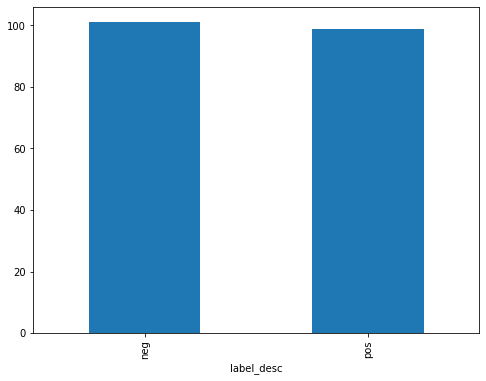

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_200.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_200['label_desc'].value_counts())
plt.show()

In [56]:
df_0 = pd.concat([df_200, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1400, 6958)

In [57]:
X_train = features[:200]
vali_X = features[200:400] # altogether 200 posts in validation set
y_train = labels[:200]
vali_Y = labels[200:400]
X_test = features[400:]
y_test = labels[400:]
# print(type(X_test))

f1_200 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.8792270531400966
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.839
Precision Score : 0.8434636536427411
Recall Score : 0.839
F1 Score : 0.8384752059441125


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
########################### Data Size = 300 ##################################

pos    155
neg    145
Name: label_desc, dtype: int64


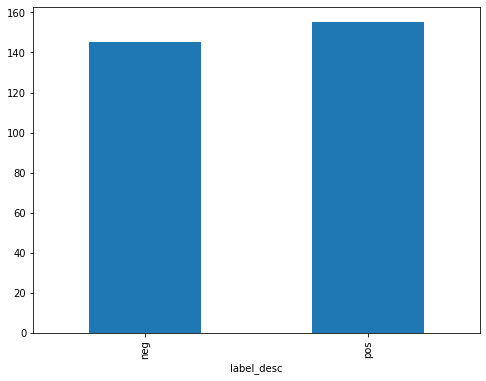

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_300.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_300['label_desc'].value_counts())
plt.show()

In [60]:
df_0 = pd.concat([df_300, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1500, 7299)

In [61]:
X_train = features[:300]
vali_X = features[300:500] # altogether 200 posts in validation set
y_train = labels[:300]
vali_Y = labels[300:500]
X_test = features[500:]
y_test = labels[500:]
# print(type(X_test))

f1_300 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.8896025692492975
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.858
Precision Score : 0.8591262198253724
Recall Score : 0.858
F1 Score : 0.8578885846503659


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [62]:
########################### Data Size = 400 ##################################

neg    204
pos    196
Name: label_desc, dtype: int64


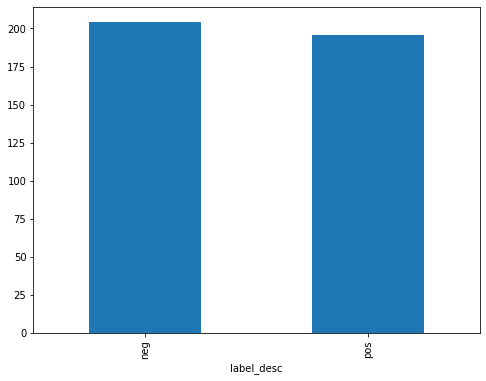

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_400.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_400['label_desc'].value_counts())
plt.show()

In [64]:
df_0 = pd.concat([df_400, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1600, 7770)

In [65]:
X_train = features[:400]
vali_X = features[400:600] # altogether 200 posts in validation set
y_train = labels[:400]
vali_Y = labels[400:600]
X_test = features[600:]
y_test = labels[600:]
# print(type(X_test))

f1_400 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.899749373433584
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.87
Precision Score : 0.8713368125250903
Recall Score : 0.87
F1 Score : 0.8698828946051447


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [66]:
########################### Data Size = 500 ##################################

neg    250
pos    250
Name: label_desc, dtype: int64


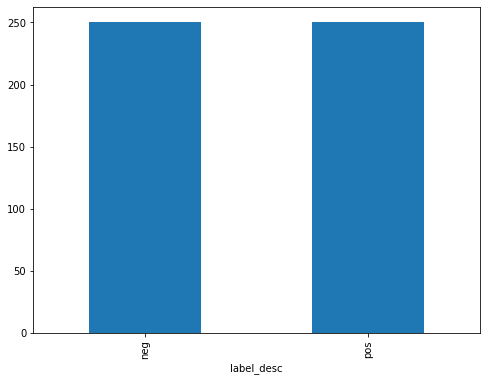

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_500.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_500['label_desc'].value_counts())
plt.show()

In [68]:
df_0 = pd.concat([df_500, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1700, 8115)

In [69]:
X_train = features[:500]
vali_X = features[500:700] # altogether 200 posts in validation set
y_train = labels[:500]
vali_Y = labels[500:700]
X_test = features[700:]
y_test = labels[700:]
# print(type(X_test))

f1_500 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 0.8998397435897436
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.877
Precision Score : 0.8773396056450806
Recall Score : 0.877
F1 Score : 0.8769723187717235


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [70]:
########################### Data Size = all ##################################

neg    2000
pos    2000
Name: label_desc, dtype: int64


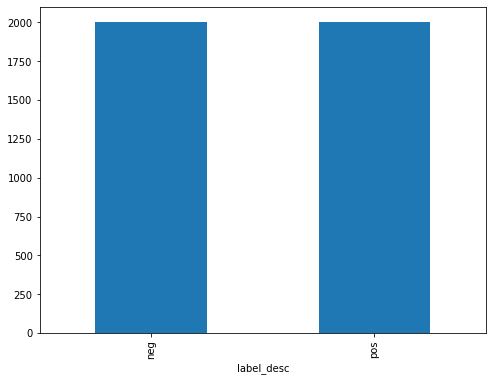

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
final_df.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(final_df['label_desc'].value_counts())
plt.show()

In [72]:
df_0 = pd.concat([final_df, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(5200, 21059)

In [73]:
X_train = features[:4000]
vali_X = features[4000:4200] # altogether 200 posts in validation set
y_train = labels[:4000]
vali_Y = labels[4000:4200]
X_test = features[4200:]
y_test = labels[4200:]
# print(type(X_test))

f1_all = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score: 1.0
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [74]:
print(str(f1_10), "\n",
      str(f1_20), "\n",
      str(f1_30), "\n",
      str(f1_40), "\n",
      str(f1_50), "\n",
      str(f1_60), "\n",
      str(f1_70), "\n",
      str(f1_80), "\n",
      str(f1_90), "\n",
      str(f1_100), "\n",
      str(f1_200), "\n",
      str(f1_300), "\n",
      str(f1_400), "\n",
      str(f1_500), "\n",
      str(f1_all))

0.36799128944052306 
 0.7079887957234094 
 0.6069874313473467 
 0.5785686927381624 
 0.6962076589424651 
 0.6712889648386264 
 0.7433094859565448 
 0.7700305910418228 
 0.796199216275006 
 0.7893577030267678 
 0.8384752059441125 
 0.8578885846503659 
 0.8698828946051447 
 0.8769723187717235 
 1.0
